#### Decision tree with Scikit-Learn
How to train a model in machine learning.
The process of training an Machine Learning (ML) model involves providing an ML algorithm with training data to learn from. The term ML model refers to the model artifact that is created by the training process.

The training data must contain the correct answer, which is known as a target. The learning algorithm finds patterns in the training data that map the input data attributes to the target (the answer that you want to predict), and it outputs an ML model that captures these patterns.

Train a decision tree with Scikit-Learn
Now, we are going to train a decision tree to classify our instances using Scikit-Learn.

We must first create an object corresponding to the model. This object will be of the DecisionTreeClassifier class, which we imported from the Scikit-Learn library.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples=1000, centers=2,
                  random_state=0, cluster_std=1.3)

In [3]:
print('X shape:', X.shape)

X shape: (1000, 2)


In [4]:
print('Y shape:', y.shape)

Y shape: (1000,)


1. Plot the relation between  **X1** and **X2** .

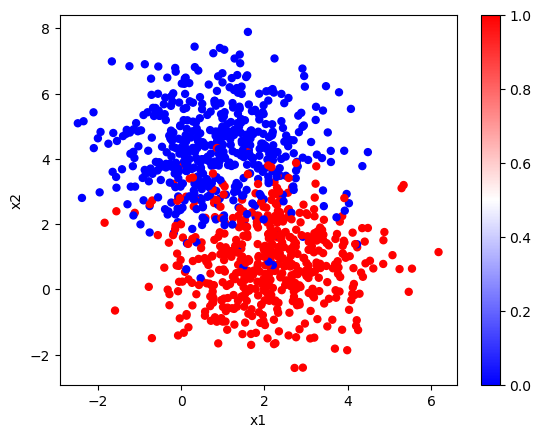

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='bwr')
plt.colorbar()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

#### Simple classification algorithm

2- Decision tree with Scikit-Learn:

Now, we are going to train a decision tree to classify our instances.

In [6]:
from sklearn.tree import DecisionTreeClassifier

# decision tree
tree = DecisionTreeClassifier(max_depth=3, random_state = 42)

In [7]:
tree.fit(X,y)

DecisionTreeClassifier(max_depth=3, random_state=42)

3- Check the model predictions

In [8]:
inst = np.array([4,0]) 
inst = inst.reshape(1,-1) 
y_pred = tree.predict(inst) # prediction
print(y_pred) # print the prediction

[1]


In [9]:
#compare the prediction with real label
np.random.seed(3) # seed
n = 3
idxs = np.random.randint(X.shape[0], size=3)
inst_t = X[idxs,:]
y_pred = tree.predict(inst_t)


##### Decision boundaries
Introduction to decision boundaries
Let's go back to one aspect of the classifier: given the characteristics 
 and 
 of an instance, it determines the corresponding label 
 (0: blue, 1: red). We can imagine that the classifier paints the 
, 
 plane with the color it best considers. If there are areas that are blue and areas that are red, there must be a boundary where the color changes.

Let's attempt to visualize it.

The function we define in the next cell allows us to explore what the decision domain of our tree looks like once we train it.

In [16]:
def visualize_classifier(tree, X, y, ax=None, cmap='bwr'):
    ax = ax or plt.gca()

    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3, alpha = 0.5)
    ax.axis('tight')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
#     ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)



C:\Users\Syed Abdul Kareem\AppData\Local\Temp\ipykernel_18540\647993974.py:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


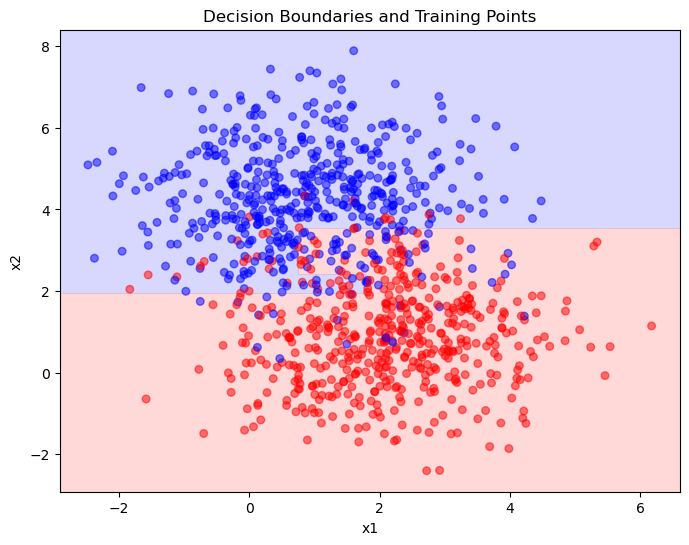

In [17]:
plt.figure(figsize=(8, 6))
visualize_classifier(tree, X, y)
plt.title("Decision Boundaries and Training Points")
plt.show()

###### The line that split both areas is the decision boundary.

The decision boundary is the region of a problem space in which the output label of a classifier is ambiguous.

If the decision surface is a hyperplane, then the classification problem is linear, and the classes are linearly separable. Decision boundaries are not always clear-cut.

#### Accuracy score
In the previous figure, the points (instances) that are on a background of the same color are correctly classified by the model. This means that if we use the model to predict its label 
 based on its coordinates 
 and 
, it would give us the original label of the point. Conversely, points that are on a background of a different color are misclassified.

We could then ask ourselves:

What is the percentage of instances well classified by the model?

To answer this, we will use the predict method on the entire dataset 
. Then, using the accuracy_score function, we can calculate the percentage of correct predictions by comparing our y_pred prediction to the original 
 class. It's advisable to review the documentation of this function, but for now, we will simply state that it is one of the many metrics used to evaluate our models.

In [18]:
from sklearn.metrics import accuracy_score

y_pred = tree.predict(X)
accuracy_score(y_pred,y)


0.905

#### Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y,y_pred))


[[439  61]
 [ 34 466]]


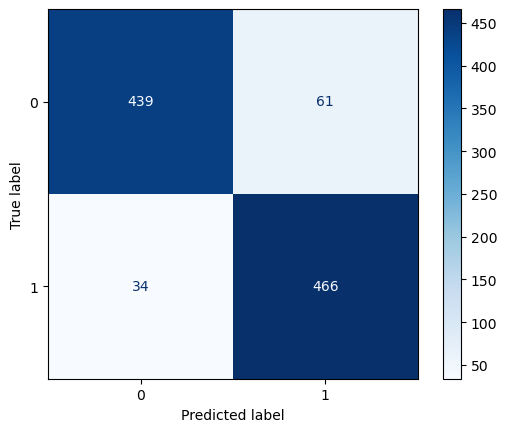

In [20]:
#OR
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap = plt.get_cmap('Blues'))                           


In [21]:
clf = DecisionTreeClassifier(random_state=42, max_depth=3)

# Fit the classifier on the data
clf.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

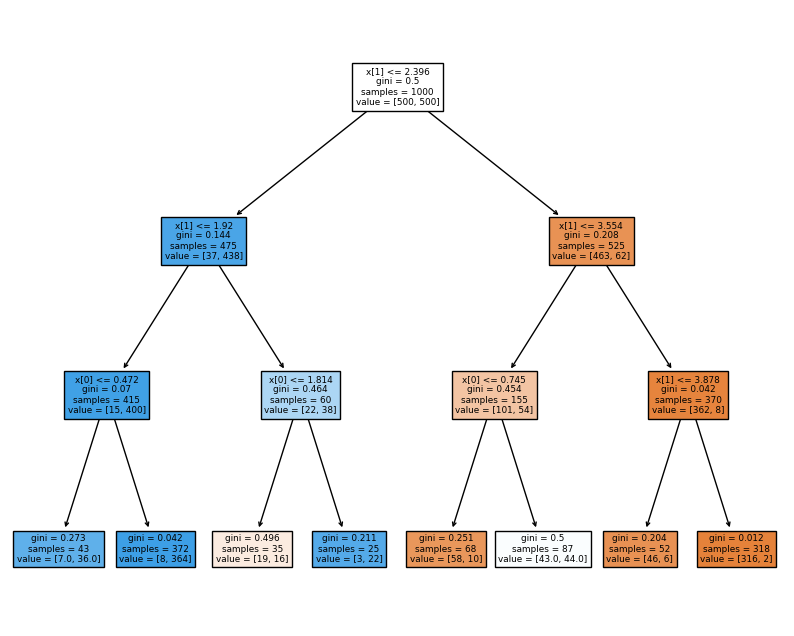

In [22]:
from sklearn import tree
# Plot the Decision Tree trained above with parameters filled as True
plt.figure(figsize = (10,8))
tree.plot_tree(clf, filled = True)
plt.show()


#### Conclusion
This lab introduces one of the most simplest classification techniques and algorithms to predict the value of the class label based on the features in the dataset. We learned how to implement a Decision tree algorithm using scikit-learn. You have seen that this model is intuitive and easy to explain to technical teams. If you want to learn more about Decision Trees, take the lab on how to code one from scratch. The theory behind how it works will be covered, and then the implementation in Python will be demonstrated.